# load R libraries

In [34]:
library(gplots)
library(plotrix)
library(RColorBrewer)

library(ggbiplot)

suppressMessages(library(gtools)) 
suppressMessages(library(Hmisc))
  suppressMessages(library(minet))
  suppressMessages(library(reshape2))
  suppressMessages(library(plyr))
  suppressMessages(library(outliers))
  suppressMessages(library(magrittr))
  suppressMessages(library(dplyr))
  suppressMessages(library(tidyr))
  suppressMessages(library(purrr))
  suppressMessages(library(stringr))
  options(stringsAsFactors = FALSE)

library(genefilter)
suppressMessages(library(gtools)) 
suppressMessages(library(Hmisc))
suppressMessages(library(minet))
suppressMessages(library(reshape2))
suppressMessages(library(plyr))
suppressMessages(library(outliers))
suppressMessages(library(magrittr))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(purrr))
suppressMessages(library(stringr))
suppressMessages(library(limma))

library(methods)
library(edgeR)

options(stringsAsFactors = FALSE)

In [35]:
stats_dir = '~/Downloads/base/test_smallonly/stat_mapped/'
counts_dir = '~/Downloads/base/test_smallonly/counts/'

# percentage mapped

In [36]:
setwd('~/Downloads/')

fi = list.files(stats_dir)[grepl('mapped.txt',list.files(stats_dir))]

tab = read.table(paste(stats_dir,list.files(stats_dir)[grepl('mapped.txt',list.files(stats_dir))][1],sep = ''),
                 sep =  '+', fill = T) %>% as.data.frame %>% filter(grepl('total|mapped \\(',V2)) %>%
mutate(V2 = c('total','mapped')) %>% select(-V3) %>% mutate(sample = list.files(stats_dir)[grepl('mapped.txt',list.files(stats_dir))][1])

for (counts_file in fi[2:length(fi)]) {
    tab_next = read.table(paste(stats_dir, counts_file,sep = ''), sep =  '+', fill = T) %>% 
    as.data.frame %>% filter(grepl('total|mapped \\(',V2)) %>%
mutate(V2 = c('total','mapped')) %>% select(-V3) %>% mutate(sample = counts_file)
    
    tab = bind_rows(tab, tab_next) 
}

In [37]:
pre_align = tab %>% filter(grepl('total',V2)) %>% rowwise %>% 
  mutate(patient = strsplit(sample,split='_')[[1]][1],      
         pat = gsub('RF-','',patient),
         pat = gsub('RF','',pat),
         pat = gsub('-1','',pat),
         pat = gsub('-2','',pat),
         pat = gsub('-3','',pat)) %>% ungroup %>% arrange(V1) %>% mutate(ord = row_number(), patient = 
                                                                        factor(ord, labels = as.character(pat))) %>%
rename(total_read = V1)

first_align = tab %>% filter(grepl('mapped',V2)) %>%
rename(first_align = V1) %>% select(-V2) %>% left_join(pre_align) 

align = bind_rows(first_align %>% select(first_align, patient, pat, ord) %>% rename(n_reads = first_align) %>%
                  mutate(step = '2.first'),
first_align %>% select(total_read, patient, pat, ord) %>% mutate(step = '1.pre') %>% rename(n_reads = total_read))
align %>% head

Joining by: "sample"


,n_reads,patient,pat,ord,step
1,259278,106,106,16,2.first
2,406276,107,107,29,2.first
3,201915,108,108,13,2.first
4,286783,109,109,22,2.first
5,301429,110,110,15,2.first
6,284261,113,113,19,2.first


In [38]:
##
fi = list.files(stats_dir)[grepl('mapped.t1.txt',list.files(stats_dir))]
tabt1 = read.table(paste(stats_dir,list.files(stats_dir)[grepl('mapped.t1.txt',list.files(stats_dir))][1],sep = ''),
                 sep =  '+', fill = T) %>% as.data.frame %>% filter(grepl('mapped \\(',V2)) %>% 
select(-V3) %>% mutate(sample = list.files(stats_dir)[grepl('mapped.t1.txt',list.files(stats_dir))][1])
for (counts_file in fi[2:length(fi)]) {
    tab_next = read.table(paste(stats_dir, counts_file,sep = ''), sep =  '+', fill = T) %>% 
    as.data.frame %>% select(-V3) %>% mutate(sample = counts_file)  %>% filter(grepl('mapped \\(',V2))
    
    tabt1 = bind_rows(tabt1, tab_next) }

##
fi = list.files(stats_dir)[grepl('mapped.t2.txt',list.files(stats_dir))]
tabt2 = read.table(paste(stats_dir,list.files(stats_dir)[grepl('mapped.t2.txt',list.files(stats_dir))][1],sep = ''),
                 sep =  '+', fill = T) %>% as.data.frame %>% filter(grepl('mapped \\(',V2)) %>% 
select(-V3) %>% mutate(sample = list.files(stats_dir)[grepl('mapped.t2.txt',list.files(stats_dir))][1])
for (counts_file in fi[2:length(fi)]) {
    tab_next = read.table(paste(stats_dir, counts_file,sep = ''), sep =  '+', fill = T) %>% 
    as.data.frame %>% select(-V3) %>% mutate(sample = counts_file)  %>% filter(grepl('mapped \\(',V2))
    
    tabt2 = bind_rows(tabt2, tab_next) }

##
fi = list.files(stats_dir)[grepl('mapped.t3.txt',list.files(stats_dir))]
tabt3 = read.table(paste(stats_dir,list.files(stats_dir)[grepl('mapped.t3.txt',list.files(stats_dir))][1],sep = ''),
                 sep =  '+', fill = T) %>% as.data.frame %>% filter(grepl('mapped \\(',V2)) %>% 
select(-V3) %>% mutate(sample = list.files(stats_dir)[grepl('mapped.t3.txt',list.files(stats_dir))][1])
for (counts_file in fi[2:length(fi)]) {
    tab_next = read.table(paste(stats_dir, counts_file,sep = ''), sep =  '+', fill = T) %>% 
    as.data.frame %>% select(-V3) %>% mutate(sample = counts_file)  %>% filter(grepl('mapped \\(',V2))
    
    tabt3 = bind_rows(tabt3, tab_next) }
##

align =                 tabt1 %>% mutate(step = '3.first_trim') %>% rename(n_reads = V1) %>% bind_rows(
tabt2 %>% mutate(step = '4.second_trim') %>% rename(n_reads = V1)) %>% bind_rows(
tabt3 %>% mutate(step = '5.third_trim') %>% rename(n_reads = V1)) %>% rowwise %>%
 mutate(patient = strsplit(sample,split='_')[[1]][1],      
         pat = gsub('RF-','',patient),
         pat = gsub('RF','',pat),
         pat = gsub('-1','',pat),
         pat = gsub('-2','',pat),
         pat = gsub('-3','',pat)) %>% ungroup %>% select(-sample,-patient) %>%
left_join( pre_align %>% select(pat, patient, ord) %>% distinct()) %>% 
select(-V2) %>% bind_rows(align)

Joining by: "pat"


In [39]:
align %<>% filter(step != '1.pre') %>% arrange(pat, step) %>% 
mutate(n_reads_cumu = cumsum(n_reads)) %>% ungroup %>% bind_rows(
align %>% filter(step == '1.pre')) %>%
arrange(pat, step) %>% mutate(n_reads_cumu = ifelse(is.na(n_reads_cumu), n_reads, n_reads_cumu)) %>%
mutate(n_reads= n_reads / 1000000)

In [40]:
pretty(align$n_reads, n = 20)


[1] 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0 8.5 9.0

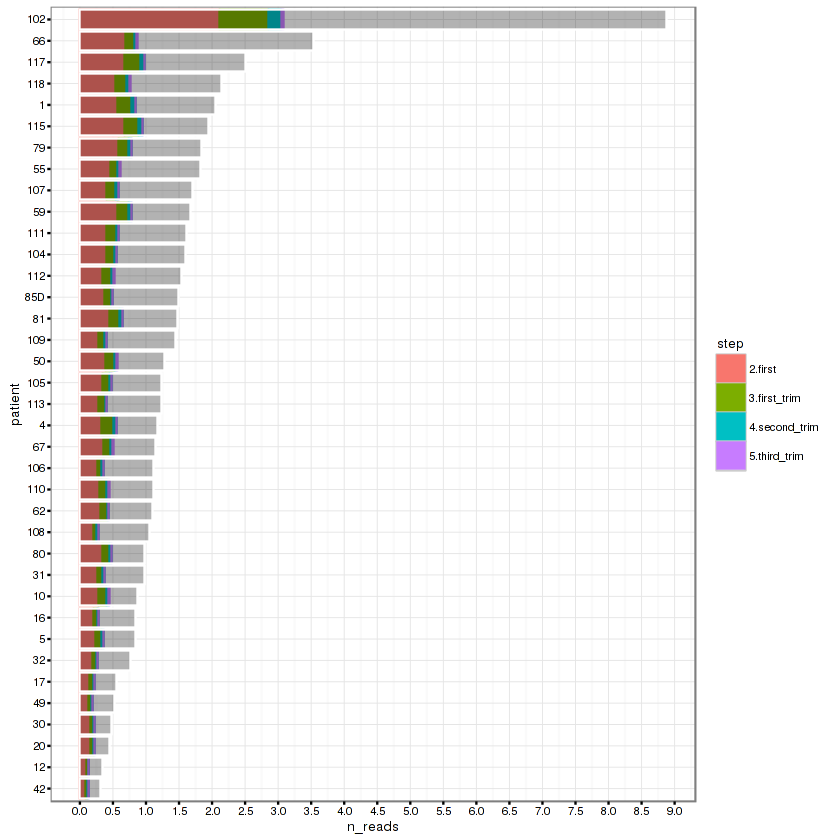

In [41]:
ggplot(align %>% filter(step != '1.pre')
       , aes(x = patient, y = n_reads, fill = step, color = step)) + geom_bar(stat = 'identity') +
theme_bw(8) +

geom_bar(data = align %>% filter(step == '1.pre')
       , aes(x = patient, y = n_reads)
         , stat = 'identity', alpha = 0.3, fill = 'black', color = 'white') +

coord_flip() + scale_y_continuous(breaks = pretty(align$n_reads, n = 20))

# get count matrix

In [42]:
setwd('~/Downloads/')

 tab = read.table(paste(counts_dir,list.files(counts_dir)[1],sep = '/')) %>% as.data.frame %>% rename(micro = V1, count = V3) %>% select(-V2, -V4) %>%
mutate(sub_micro = gsub('-1$','',micro),sub_micro=gsub('-2$','',sub_micro), sub_micro=gsub('-3$','',sub_micro)) %>%
group_by(sub_micro) %>% summarise(count = sum(count)) %>% arrange(desc(count)) %>% 
 #  filter(count > 0, !is.na(count)) %>%
filter(count > 0, !is.na(count), grepl('hsa-mi',sub_micro) | grepl('hsa-let',sub_micro) ) %>%
#filter(count > 0, !is.na(count), !grepl('hsa-mi',sub_micro), !grepl('hsa-let',sub_micro) ) %>%
    mutate(sample = list.files(counts_dir)[1])

tab %>% dim

for (counts_file in list.files(counts_dir)[2:length(list.files(counts_dir))]) {
    tab_next = read.table(paste(counts_dir,counts_file,sep = '/')) %>% as.data.frame %>% rename(micro = V1, count = V3) %>% select(-V2, -V4) %>%
mutate(sub_micro = gsub('-1$','',micro),sub_micro=gsub('-2$','',sub_micro), sub_micro=gsub('-3$','',sub_micro)) %>%
group_by(sub_micro) %>% summarise(count = sum(count)) %>% arrange(desc(count)) %>% 
#    filter(count > 0, !is.na(count)) %>%
filter(count > 0, !is.na(count), grepl('hsa-mi',sub_micro) | grepl('hsa-let',sub_micro) ) %>%
#filter(count > 0, !is.na(count), !grepl('hsa-mi',sub_micro), !grepl('hsa-let',sub_micro) ) %>%
    mutate(sample = counts_file)
    tab = bind_rows(tab, tab_next)
    print(tab %>% dim)
}
tab$sample %>% table

[1] 715   3

[1] 1585    3
[1] 2304    3
[1] 3049    3
[1] 3809    3
[1] 4563    3
[1] 6067    3
[1] 6916    3
[1] 7668    3
[1] 8359    3
[1] 9214    3
[1] 10040     3
[1] 10946     3
[1] 11869     3
[1] 12784     3
[1] 13320     3
[1] 13970     3
[1] 14618     3
[1] 15210     3
[1] 15788     3
[1] 16523     3
[1] 17202     3
[1] 17708     3
[1] 18336     3
[1] 19059     3
[1] 19835     3
[1] 20698     3
[1] 21515     3
[1] 22233     3
[1] 23042     3
[1] 24002     3
[1] 24803     3
[1] 25700     3
[1] 26580     3
[1] 27498     3


.
 106-1_S17_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        715 
   107_S13_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        870 
 108-1_S12_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        719 
 109-2_S16_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        745 
 110-3_S15_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        760 
   113_S14_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        754 
RF-102_S15_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                       1504 
  RF104_S4_L001_R1_001.fastq.assembled.fastq.full.count.txt 
                                                        849 
  RF105_S5_L001_R1_001

In [43]:
mat = tab %>% select(sample, sub_micro, count) %>% spread(., sub_micro, count, fill = 0)
#mat

# get pheno group info

In [44]:
groups = read.csv('/home/guillaume/Downloads/base/samcount/groups.csv',header = TRUE)
groups %>% head

,Fila.en.placa.arrays,pat,Género,Fumador,Edad,BMI,EPOC,X.FEV1.Pre.BD,GOLD.sobre.Fev1.pre,X..FVC.Pre.BD,FEV1.FVC.Pre,Pack.year,DLCO,TAC.Enfisema.comprobado,Pulmón..cáncer.,gold,batch
1,A1,1,Hombre,Ex-fumador,69,32.41,SI,82.54,GOLD I,88.54,66.28,44,84.30,NO,SI,3,f
2,A4,4,Hombre,Ex-fumador,63,27.25,SI,61.95,GOLD II,86.74,51.99,NA,129.83,NO,SI,22,f
3,A5,5,Hombre,Ex-fumador,76,30.10,SI,69.19,GOLD II,94.07,55.35,NA,86.72,NO,SI,20,f
4,A9,10,Hombre,Ex-fumador,64,26.81,SI,69.34,GOLD II,96.75,51.97,47,81.00,NO,SI,16,f
5,A10,12,Hombre,Ex-fumador,73,24.54,SI,82.62,GOLD I,100.67,62.54,25,106.77,NO,SI,6,f
6,B2,16,Mujer,Ex-fumador,64,29.75,SI,64.15,GOLD II,84.27,55.20,30,171.62,NO,SI,23,f


In [45]:
files <- mat$sample
pheno = data_frame(sample = files) %>% rowwise %>% 
  mutate(patient = strsplit(sample,split='_')[[1]][1],      
         pat = gsub('RF-','',patient),
         pat = gsub('RF','',pat),
         pat = gsub('-1','',pat),
         pat = gsub('-2','',pat),
         pat = gsub('-3','',pat)) %>% ungroup %>% left_join(groups) %>% mutate(dlco_group = ifelse(DLCO < 60,'disease','control')) #15 vs 22

pheno$dlco_group %>% table

Joining by: "pat"


.
control disease 
     13      22 

In [46]:
data = mat %>% select(-sample)
data = as.matrix(data)
data %>% dim

[1]   35 2274

# pre-process pca

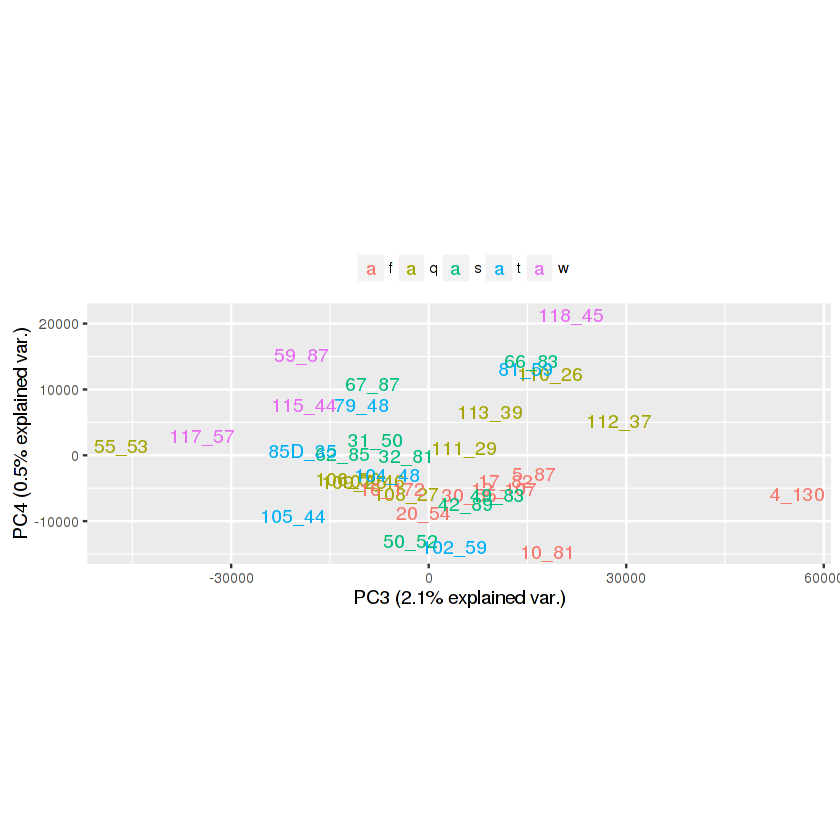

In [47]:
ir.pca <- prcomp(data)
#plot(ir.pca, type = "l")
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, choices = 3:4, labels.size = 4,
              ellipse = F, circle = F, groups = pheno$batch,
              var.axes = F, labels = paste(pheno$pat %>% as.character, round(pheno$DLCO),sep='_'))
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal',
               legend.position = 'top')
print(g)

# process raw counts with voom / limma

In [48]:
x = data %>% t

In [49]:
x %>% dim
res <- DGEList(counts=x, genes=row.names(x))
keep=rowSums(cpm(res, normalized.lib.sizes=FALSE)>=1)>=20
matrix=x[keep,]
matrix %>% dim
x = matrix
res <- DGEList(counts=matrix, genes=row.names(matrix))

#res$samples$lib.size <- unlist(lib_size[3])
result <- calcNormFactors(res, method="TMM") #method=c("TMM","RLE","upperquartile","none")

[1] 2274   35

[1] 607  35

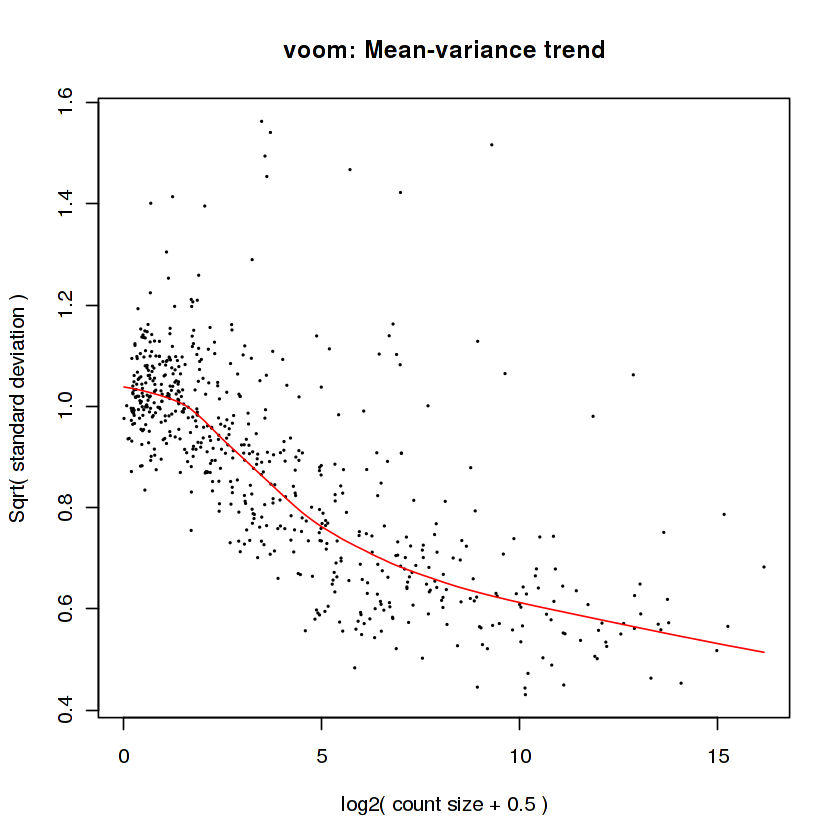

In [50]:
des = model.matrix(~ 1 + pheno$BMI + as.factor(pheno$batch) + as.factor(pheno$dlco_group))
#des = model.matrix(~ 1 + as.factor(pheno$batch) + pheno$DLCO)
v = voom(result, design = des, plot=T)#, normalize="quantile")

In [51]:
fit <- lmFit(v, des)
fit <- eBayes(fit, robust = T)
pvals = topTable(fit, coef = ncol(des), number= 2000, sort.by = 'P') 

limma_fdr_batchage25 = sum(pvals$adj.P.Val < 0.25)
limma_fdr_batchage05 = sum(pvals$adj.P.Val < 0.05)
limma_fdr_batchage01 = sum(pvals$adj.P.Val < 0.01)
limma_batchage05 = sum(pvals$P.Value < 0.05)
limma_batchage05
limma_fdr_batchage25
limma_fdr_batchage05
limma_fdr_batchage01

mirs = pvals %>% as.data.frame %>% mutate(fc = gtools::logratio2foldchange(logFC)) %>% 
filter(fc < -1.6 | fc > 1.6, P.Value < 0.05) %>%
arrange(desc(abs(fc))) %>% 
head(20)
mirs

[1] 21

[1] 0

[1] 0

[1] 0

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B,fc
1,hsa-miR-889-3p,-1.7516437,2.615319,-3.441050,0.001376871,0.8357609,-4.415614,-3.367420
2,hsa-miR-3182,-1.3726915,4.171605,-2.029498,0.049953060,0.9569044,-4.529336,-2.589532
3,hsa-miR-10b-5p,-1.3527557,10.776801,-2.228357,0.033936159,0.9569044,-4.267285,-2.553995
4,hsa-miR-491-5p,-1.3365622,1.628261,-2.539249,0.015130475,0.9569044,-4.514766,-2.525488
5,hsa-miR-548f-5p,-1.3051011,1.751807,-2.269922,0.028712971,0.9569044,-4.530270,-2.471010
6,hsa-miR-744-3p,-1.2877514,1.752714,-2.400020,0.021174351,0.9569044,-4.523298,-2.441472
7,hsa-miR-4326,-1.2849010,1.625727,-2.270932,0.028646173,0.9569044,-4.532775,-2.436653
8,hsa-miR-369-5p,-1.2725441,2.633895,-2.092754,0.042805412,0.9569044,-4.541154,-2.415872
9,hsa-miR-1278,-1.2645658,2.548574,-2.497113,0.016768474,0.9569044,-4.507923,-2.402549
10,hsa-miR-3196,-1.2326290,1.841353,-2.787738,0.008103870,0.9569044,-4.493636,-2.349948


# plots on normalized counts

## log normalized counts

In [52]:
nc <- cpm(res, normalized.lib.sizes=FALSE)
log.nc = log(nc+1)
colnames(log.nc) = pheno$sample
log.nc.filt = removeBatchEffect(log.nc, batch=as.factor(pheno$batch), 
                                design = model.matrix(~ 1 + pheno$BMI + pheno$Edad + as.factor(pheno$dlco_group)))
##log.nc.filt = log.nc
log.nc.filt %>% head

,106-1_S17_L001_R1_001.fastq.assembled.fastq.full.count.txt,107_S13_L001_R1_001.fastq.assembled.fastq.full.count.txt,108-1_S12_L001_R1_001.fastq.assembled.fastq.full.count.txt,109-2_S16_L001_R1_001.fastq.assembled.fastq.full.count.txt,110-3_S15_L001_R1_001.fastq.assembled.fastq.full.count.txt,113_S14_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-102_S15_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF104_S4_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF105_S5_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-10_S17_L001_R1_001.fastq.assembled.fastq.full.count.txt,⋯,RF-50_S9_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF55-1_S10_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-59_S2_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-5_S16_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-62_S10_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-66_S9_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF67_S13_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF79_S2_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-81_S12_L001_R1_001.fastq.assembled.fastq.full.count.txt,RF-85D_S13_L001_R1_001.fastq.assembled.fastq.full.count.txt
hsa-let-7a-3p,5.308881,5.035340,4.927840,4.833165,5.233805,5.751762,4.883992,5.0256953,5.159285,4.6562428,⋯,4.764725,4.760686,5.188807,4.237129,5.540339,4.672939,5.357140,6.011026,5.1189841,5.222271
hsa-let-7a-5p,10.271641,9.812988,10.542302,10.116141,9.812859,10.014569,9.975715,10.0549877,10.019506,9.6960856,⋯,10.110116,10.400646,10.203912,10.133273,9.904982,9.778016,10.098136,10.353803,9.9925662,10.736770
hsa-let-7b-3p,4.545731,4.371221,4.080407,3.971362,4.000102,4.225315,4.343861,4.5450196,4.147916,4.5476315,⋯,4.161807,4.657123,4.391198,3.629245,4.702804,3.763663,4.301577,4.570025,3.6883756,4.501066
hsa-let-7b-5p,9.269030,9.074590,9.710274,9.262390,8.866262,9.011401,9.183841,9.3880165,9.221554,8.8991418,⋯,9.190754,9.511785,9.214953,9.352690,9.040977,8.980409,9.055118,9.199243,9.0967179,9.674199
hsa-let-7c-3p,2.178369,0.289840,1.816806,2.079141,2.340872,1.527528,1.399624,0.9057919,1.009822,0.1389992,⋯,1.108887,0.289840,1.758482,1.478896,2.149846,1.585132,1.185606,1.143571,0.8177503,1.488573
hsa-let-7c-5p,7.805202,7.312201,8.270139,7.550807,7.217857,7.718957,7.626380,7.7198284,7.446646,7.2890380,⋯,7.570335,7.757365,8.093514,7.950474,7.703549,7.659356,7.664312,7.849805,7.2432650,8.263811


## pca

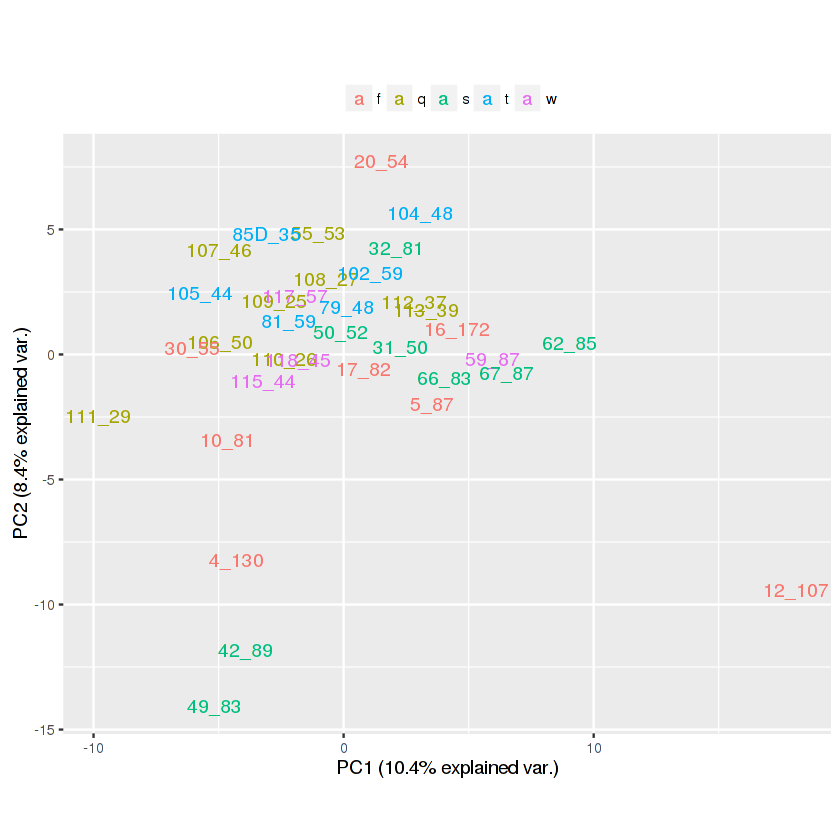

In [53]:
ir.pca <- prcomp(log.nc.filt %>% t)
#plot(ir.pca, type = "l")
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, choices = 1:2, labels.size = 4,
              ellipse = F, circle = F, groups = pheno$batch,
              var.axes = F, labels = paste(pheno$pat %>% as.character, round(pheno$DLCO),sep='_'))
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal',
               legend.position = 'top')
print(g)

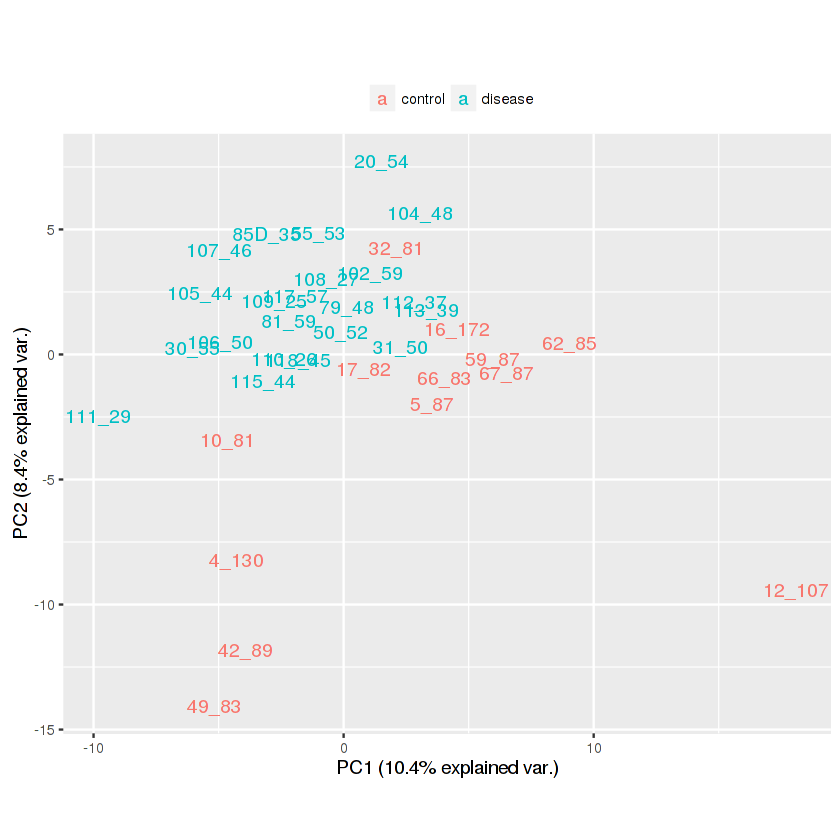

In [54]:
ir.pca <- prcomp(log.nc.filt %>% t)
#plot(ir.pca, type = "l")
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, choices = 1:2, labels.size = 4,
              ellipse = F, circle = F, groups = pheno$dlco_group,
              var.axes = F, labels = paste(pheno$pat %>% as.character, round(pheno$DLCO),sep='_'))
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal',
               legend.position = 'top')
print(g)

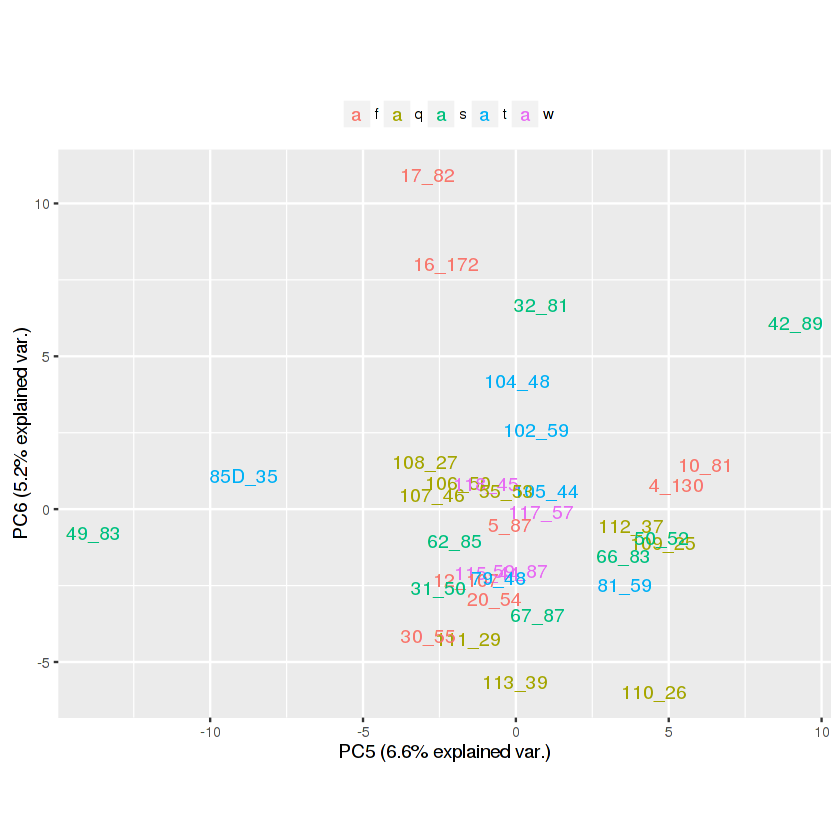

In [55]:
ir.pca <- prcomp(log.nc.filt %>% t)
#plot(ir.pca, type = "l")
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, choices = 5:6, labels.size = 4,
              ellipse = F, circle = F, groups = pheno$batch,
              var.axes = F, labels = paste(pheno$pat %>% as.character, round(pheno$DLCO),sep='_'))
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal',
               legend.position = 'top')
print(g)

## tops: dlco vs log value

In [56]:
log.melt = 
  #log.nc.filt[row.names(log.nc.filt) %in% row.names(pvals[1:limma_fdr_batchage05,]),] %>% 
  #log.nc.filt[row.names(log.nc.filt) %in% row.names(pvals[1:10,]),] %>% 
  log.nc.filt[row.names(log.nc.filt) %in% mirs$genes,] %>% 
  data.frame %>% mutate(mir = row.names(.)) %>% melt(id.vars = 'mir') %>%
  mutate(file = variable)
log.melt$file = as.character(log.melt$file) %>% gsub('X1','1',.)
log.melt %<>% rowwise %>% mutate(
  micro = mir, #strsplit(mir,split='\\|')[[1]][4],
  patient = strsplit(file,split='_')[[1]][1],      
  pat = gsub('RF\\.','',patient),
  pat = gsub('RF','',pat),
  pat = gsub('\\.1','',pat),
  pat = gsub('\\.2','',pat),
  pat = gsub('\\.3','',pat)) %>% ungroup %>% 
  left_join(groups[,c('pat','batch','Edad','DLCO')])

Joining by: "pat"


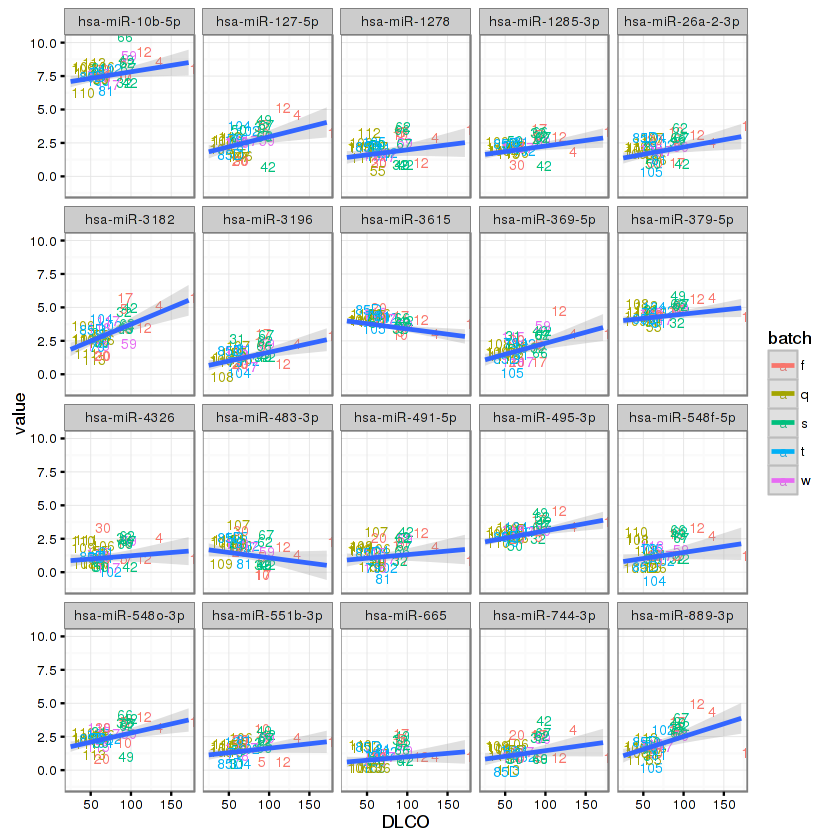

In [57]:
ggplot(log.melt, aes(x = DLCO, y = value, color = batch)) +
  geom_text(aes(label=as.character(pat)),hjust=0, vjust=0, size = 3) +
  #  geom_point(size = 5) + 
  geom_smooth(aes(x = DLCO, y = value, color = batch, group = micro), method=lm, alpha = 0.3) +
  facet_wrap(~ micro) + theme_bw(10) 
top_mics = log.melt$micro %>% unique 

## tops: heatmap

In [58]:
log.melt = 
  #log.nc.filt[row.names(log.nc.filt) %in% row.names(pvals[1:limma_fdr_batchage05,]),] %>% 
  log.nc.filt[row.names(log.nc.filt) %in% row.names(pvals[1:50,]),] %>% 
  #log.nc.filt[row.names(log.nc.filt) %in% mirs$genes,] %>% 
  data.frame %>% mutate(mir = row.names(.)) %>% melt(id.vars = 'mir') %>%
  mutate(file = variable)
log.melt$file = as.character(log.melt$file) %>% gsub('X1','1',.)
log.melt %<>% rowwise %>% mutate(
  micro = mir, #strsplit(mir,split='\\|')[[1]][4],
  patient = strsplit(file,split='_')[[1]][1],      
  pat = gsub('RF\\.','',patient),
  pat = gsub('RF','',pat),
  pat = gsub('\\.1','',pat),
  pat = gsub('\\.2','',pat),
  pat = gsub('\\.3','',pat)) %>% ungroup %>% 
  left_join(groups[,c('pat','batch','Edad','DLCO')])

Joining by: "pat"


In [59]:
x = log.melt %>% select(micro,pat,value) %>% distinct(micro, pat) %>% spread(.,micro,value)
row.names(x) = x$pat %>% as.character
row.names(x)
cov = data_frame(pat = row.names(x)) %>% left_join(log.melt %>% select(pat, DLCO) %>% distinct)
cov3 = data_frame(pat = row.names(x)) %>% left_join(pheno %>% distinct)
cov2 = data_frame(pat = row.names(x)) %>% left_join(log.melt %>% select(pat, batch) %>% distinct)
row.names(x) = cov$DLCO
x %<>% select(-pat)
#x %>% head
#row.names(x)
#paste(pheno$patient,pheno$DLCO,pheno$dlco_group,var2,sep='_')
#colnames(x) %>% head
#cov3 %>% head

[1] "10"  "102" "104" "105" "106" "107" "108" "109" "110" "111" "112" "113"
[13] "115" "117" "118" "12"  "16"  "17"  "20"  "30"  "31"  "32"  "4"   "42" 
[25] "49"  "5"   "50"  "55"  "59"  "62"  "66"  "67"  "79"  "81"  "85D"

Joining by: "pat"
Joining by: "pat"
Joining by: "pat"


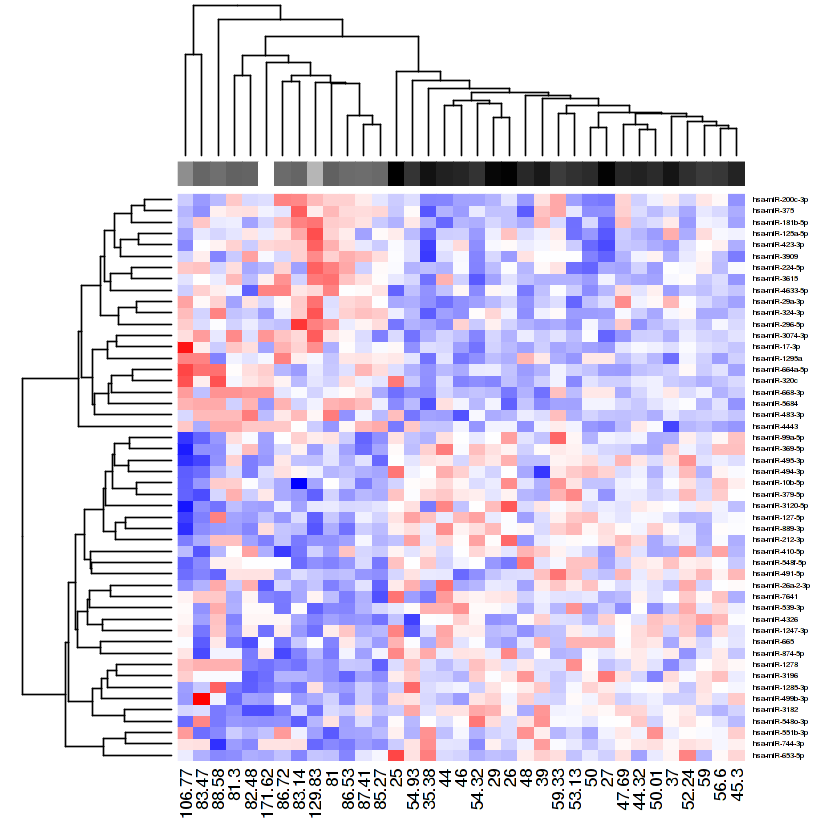

In [60]:
clust_methods = c("ward.D","ward.D2","single","complete","average","mcquitty","median","centroid")
dist.pear <- function(x) as.dist(1-cor(t(x)))
hclust.ave <- function(x) hclust(x, method=clust_methods[5])
hmcols<-colorRampPalette(c("red","white","blue"))(256)
hmcol<-brewer.pal(11,"RdBu")

var1 <- cov3$batch
var1 <- replace(var1, which(var1 == 'f'), "deepskyblue")
var1 <- replace(var1, which(var1 == 'q'), "magenta")
var1 <- replace(var1, which(var1 == 's'), "blue")
var1 <- replace(var1, which(var1 == 't'), "green")
var1 <- replace(var1, which(var1 == 'w'), "red")

var2 <- cov3$dlco_group
var2 <- replace(var2, which(var2 == 'disease'), "magenta")
var2 <- replace(var2, which(var2 == 'control'), "deepskyblue")
    
heatmap(x %>% as.matrix %>% t, 
        #ColSideColors= var2, 
        ColSideColors= color.scale(cov3$DLCO),
        col=hmcols, 
        distfun=dist.pear, hclustfun=hclust.ave,
        cexRow = 0.5,cexCol = 1.25)

In [61]:
row.names(pvals[1:10,])

[1] "hsa-miR-889-3p"  "hsa-miR-3615"    "hsa-miR-3196"    "hsa-miR-379-5p" 
 [5] "hsa-miR-491-5p"  "hsa-miR-1285-3p" "hsa-miR-495-3p"  "hsa-miR-1278"   
 [9] "hsa-miR-744-3p"  "hsa-miR-548o-3p"

## heatmap raw counts

In [62]:
clust_methods = c("ward.D","ward.D2","single","complete","average","mcquitty","median","centroid")
dist.pear <- function(x) as.dist(1-cor(t(x)))
hclust.ave <- function(x) hclust(x, method=clust_methods[5])
hmcols<-colorRampPalette(c("red","white","blue"))(256)
hmcol<-brewer.pal(11,"RdBu")

var1 <- pheno$batch
var1 <- replace(var1, which(var1 == 'f'), "deepskyblue")
var1 <- replace(var1, which(var1 == 'q'), "magenta")
var1 <- replace(var1, which(var1 == 's'), "blue")
var1 <- replace(var1, which(var1 == 't'), "green")
var1 <- replace(var1, which(var1 == 'w'), "red")

var2 <- pheno$dlco_group
var2 <- replace(var2, which(var2 == 'disease'), "magenta")
var2 <- replace(var2, which(var2 == 'control'), "deepskyblue")
    
#heatmap(log.nc %>% as.matrix, 
 #       ColSideColors= var2, 
  #      #ColSideColors= color.scale(pheno$DLCO),
   #     col=hmcols, 
    #    distfun=dist.pear, hclustfun=hclust.ave,
     #   cexRow = 0.5,cexCol = 1.25)